# Clustering with DBSCAN on Geospatial Data

**Project Name:** Clustering with DBSCAN on Geospatial Data  
**Date:** February 14th, Day 38

---

## 1. Introduction and Objective

**Introduction:**  
Clustering is an essential unsupervised learning technique used to group similar data points. In geospatial applications, clustering can help identify groups of customers, hotspots of activity, or any regions of interest on a map. In this project, we use DBSCAN—a density-based clustering algorithm—to cluster geospatial data (latitude and longitude coordinates). DBSCAN is particularly well-suited for geospatial data because it can discover clusters of arbitrary shape and distinguish noise (outliers) from clusters.

**Objective:**  
- Understand the DBSCAN algorithm: its definition, why and how it is used, and its advantages and limitations.
- Learn the mathematical formulation behind DBSCAN.
- Implement DBSCAN on a synthetic geospatial dataset to simulate customer locations.
- Visualize and analyze the clustering results.

---

## 2. Metadata

- **Dataset:** Synthetic geospatial data simulating customer locations.
- **Technologies:** Python, NumPy, Pandas, Matplotlib, Seaborn, Scikit-Learn.
- **Algorithm:** DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
- **Environment:** Jupyter Notebook / Google Colab (CPU-friendly execution).
- **Application:** Clustering customer locations, anomaly detection in spatial data.

---

## 3. Dataset Overview

For this notebook, we generate a synthetic geospatial dataset. The dataset simulates customer locations using latitude and longitude coordinates. It contains several clusters that represent areas of high customer concentration, along with some random noise (outliers). This dataset will help demonstrate how DBSCAN identifies clusters of varying shapes and separates noise.

---

## 4. Conceptual Overview of DBSCAN

### 4.1 What is DBSCAN?

DBSCAN stands for **Density-Based Spatial Clustering of Applications with Noise**. It is a popular clustering algorithm that groups together data points that are closely packed together (points with many nearby neighbors) and marks points that lie alone in low-density regions as outliers (noise).

### 4.2 Why Use DBSCAN?

- **Discovery of Arbitrary Shaped Clusters:** Unlike algorithms such as k-means that assume spherical clusters, DBSCAN can find clusters of arbitrary shape.
- **Noise Handling:** DBSCAN explicitly detects and labels noise, which is beneficial when dealing with real-world data that may contain outliers.
- **No Need to Predefine the Number of Clusters:** Unlike k-means, where you must specify the number of clusters, DBSCAN determines the number of clusters based on the data density.

### 4.3 How Does DBSCAN Work? (Step-by-Step)

1. **Parameter Setting:**  
   DBSCAN requires two parameters:
   - **Epsilon (eps):** The maximum distance between two points for them to be considered as neighbors.
   - **MinPts:** The minimum number of points required to form a dense region (a cluster).

2. **Neighborhood Identification:**  
   For each point \( p \) in the dataset, the algorithm finds its \( \epsilon \)-neighborhood:
   \[
   N_{\epsilon}(p) = \{q \in D \mid d(p, q) \leq \epsilon\}
   \]
   where \( d(p, q) \) is the distance between \( p \) and \( q \).

3. **Core, Border, and Noise Points:**  
   - **Core Point:** A point \( p \) is a core point if \( |N_{\epsilon}(p)| \geq \text{MinPts} \).
   - **Border Point:** A point that is not a core point but is in the neighborhood of a core point.
   - **Noise:** Points that are neither core nor border points.

4. **Cluster Formation:**  
   - Start with an arbitrary point \( p \).  
   - If \( p \) is a core point, form a new cluster and recursively include all points in \( p \)’s neighborhood that are reachable.
   - Continue until all points are processed. Points not reachable from any core point are labeled as noise.

### 4.4 Mathematical Formulation

Given a dataset \( D \), for any point \( p \in D \), define the \( \epsilon \)-neighborhood as:
\[
N_{\epsilon}(p) = \{ q \in D \mid d(p,q) \leq \epsilon \}
\]
A point \( p \) is considered a **core point** if:
\[
|N_{\epsilon}(p)| \geq \text{MinPts}
\]
Clusters are formed by linking core points together if they are within \( \epsilon \) of one another. Border points, which are not core points themselves but fall within the \( \epsilon \)-neighborhood of a core point, are added to the cluster. Points that do not satisfy these conditions are considered noise.

### 4.5 Advantages and Disadvantages of DBSCAN

**Advantages:**
- **Flexibility in Cluster Shape:** Capable of finding clusters of arbitrary shape.
- **Robustness to Noise:** Effectively distinguishes noise from clusters.
- **No Need for Pre-Specified Cluster Count:** The algorithm automatically determines the number of clusters based on data density.

**Disadvantages:**
- **Parameter Sensitivity:** The performance of DBSCAN is highly dependent on the choice of \( \epsilon \) and \( \text{MinPts} \).
- **Difficulty with Varying Densities:** DBSCAN may struggle if clusters have significantly different densities.
- **Scalability Issues:** For very large datasets, the algorithm can be computationally expensive, although it is generally efficient on medium-sized datasets.

---

## 5. Implementation

The following sections present the implementation of DBSCAN on our synthetic geospatial dataset. Each code cell is followed by a detailed Markdown cell explaining the code.

---



In [ ]:
# Cell 1: Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

# Set plot style for visualizations
sns.set(style="whitegrid")


**Explanation for Cell 1:**  
In this cell, we import the necessary libraries:
- **NumPy** and **Pandas** for data creation and manipulation.
- **Matplotlib** and **Seaborn** for data visualization.
- **DBSCAN** from Scikit-Learn for performing density-based clustering.
  
We also set Seaborn's style to "whitegrid" for cleaner visual outputs.


In [6]:
# Cell 2: Load the Kaggle Dataset

# NOTE: Ensure you have downloaded the "Starbucks Store Locations" dataset from Kaggle
# and placed the CSV file (e.g., "Starbucks_Store_Locations.csv") in your working directory.
# Replace the file path below if necessary.

file_path = "/content/directory.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


**Explanation for Cell 2:**  
In this cell, we load the Starbucks Store Locations dataset from a CSV file.  
- The file (e.g., `"Starbucks_Store_Locations.csv"`) should be downloaded from Kaggle and placed in your working directory.
- We use Pandas' `read_csv` function to load the dataset into a DataFrame (`df`).
- Finally, we display the first few rows of the dataset using `df.head()` to verify successful loading.


In [7]:
# Cell 3: Inspect and Clean the Data

# Check the dataset's columns and info
print(df.columns)
print(df.info())

# For clustering, we need the geospatial coordinates: "Latitude" and "Longitude"
# Inspect a few rows for these columns
print(df[["Latitude", "Longitude"]].head())

# Optionally, drop rows with missing geospatial data (if any)
df = df.dropna(subset=["Latitude", "Longitude"])


Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  flo

**Explanation for Cell 3:**  
We inspect the dataset to ensure it contains the necessary columns for geospatial clustering:
- We print the column names and data types using `df.columns` and `df.info()`.
- We focus on the "Latitude" and "Longitude" columns, which are required for clustering.
- If there are any missing values in these columns, we drop those rows.


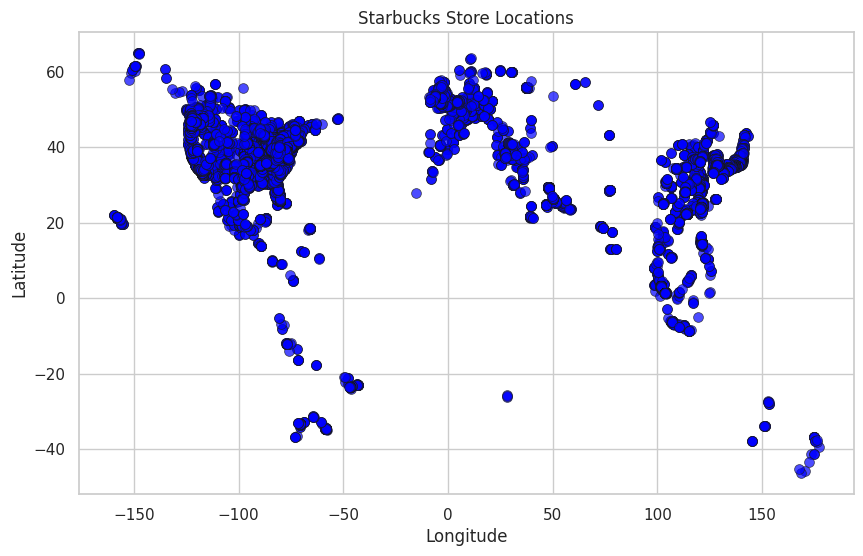

In [8]:
# Cell 4: Visualize the Geospatial Data

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Longitude", y="Latitude", s=50, color="blue", edgecolor="k", alpha=0.7)
plt.title("Starbucks Store Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**Explanation for Cell 4:**  
This cell creates a scatter plot to visualize the geospatial distribution of Starbucks store locations:
- The x-axis represents longitude and the y-axis represents latitude.
- A scatter plot is used to display the store locations, which helps in understanding the spatial distribution before clustering.
- The visualization helps identify any apparent clusters or outliers.


In [9]:
# Cell 5: Apply DBSCAN Clustering

# Define DBSCAN parameters:
# eps: maximum distance (in degrees) to consider two points as neighbors.
# min_samples: minimum number of points required to form a cluster.
eps = 0.5  # Adjust this parameter based on the data scale; 0.5 degrees is a starting point.
min_samples = 5

# Instantiate and fit DBSCAN to the geospatial data
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(df[["Latitude", "Longitude"]])

# Add the resulting cluster labels to the DataFrame (-1 indicates noise)
df["Cluster"] = dbscan.labels_
df.head()


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,Cluster
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51,-1
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42,0
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39,0
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48,0
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51,0


**Explanation for Cell 5:**  
We apply the DBSCAN algorithm to the Starbucks store locations:
- We set the **eps** parameter (e.g., 0.5 degrees) and **min_samples** (e.g., 5) based on the density and scale of the data.
- We fit DBSCAN using the "Latitude" and "Longitude" columns.
- The cluster labels (where -1 denotes noise) are added as a new column "Cluster" in the DataFrame.


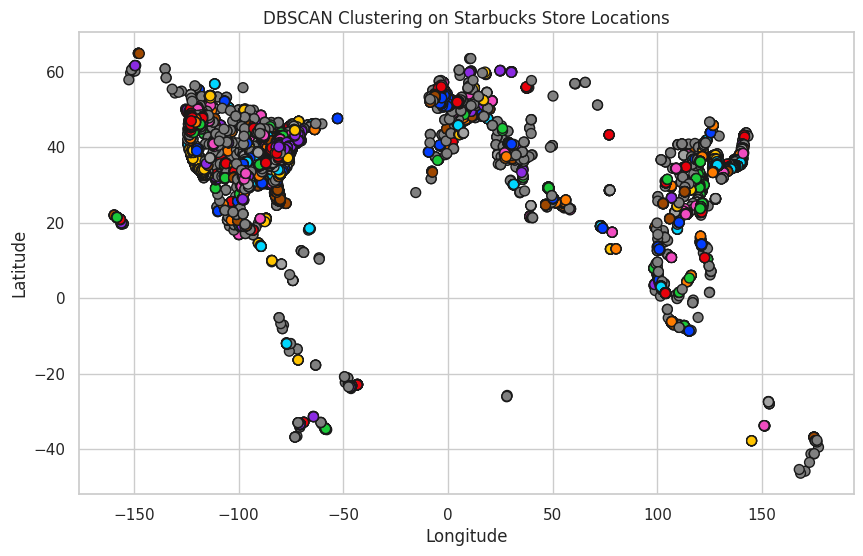

In [10]:
# Cell 6: Visualize the Clustering Results

plt.figure(figsize=(10, 6))

# Get unique clusters
unique_clusters = np.unique(df["Cluster"])

# Create a color palette: assign each cluster a unique color; noise (-1) will be gray.
palette = sns.color_palette("bright", len(unique_clusters))
colors = [palette[list(unique_clusters).index(x)] if x != -1 else (0.5, 0.5, 0.5) for x in df["Cluster"]]

plt.scatter(df["Longitude"], df["Latitude"], c=colors, s=50, edgecolor="k")
plt.title("DBSCAN Clustering on Starbucks Store Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**Explanation for Cell 6:**  
In this cell, we visualize the clusters identified by DBSCAN:
- Each data point is colored according to its cluster label.
- Points labeled as noise (with label -1) are colored in gray.
- The scatter plot allows us to see the spatial distribution of clusters and verify how well DBSCAN has grouped the stores.


## 7. Conclusion and Key Learnings

**Conclusion:**  
In this notebook, we applied DBSCAN to a real-world geospatial dataset (Starbucks Store Locations) to cluster locations based on their latitude and longitude. We:
- Loaded and inspected a Kaggle dataset containing store locations.
- Reviewed the conceptual and mathematical underpinnings of DBSCAN.
- Applied DBSCAN to identify clusters and noise in geospatial data.
- Visualized the results to assess the quality of the clustering.

**Key Learnings:**
- **DBSCAN Fundamentals:**  
  DBSCAN is a robust density-based clustering algorithm that can identify arbitrarily shaped clusters and handle noise effectively.
- **Mathematical Insight:**  
  The algorithm uses the concepts of the \( \epsilon \)-neighborhood and core points to form clusters without requiring the number of clusters as an input.
- **Advantages:**  
  - Can discover clusters of various shapes.
  - Handles noise and outliers efficiently.
  - No need to predefine the number of clusters.
- **Disadvantages:**  
  - Sensitive to the choice of parameters \( \epsilon \) and \( \text{min\_samples} \).
  - May struggle with clusters of varying densities.
- **Geospatial Applications:**  
  DBSCAN is particularly effective in clustering geospatial data where natural distances and densities are key factors.

**Next Steps:**
- Experiment with different \( \epsilon \) and \( \text{min\_samples} \) values to optimize clustering.
- Consider using geospatial distance metrics (e.g., haversine distance) for more accurate clustering when working with latitude and longitude.
- Apply DBSCAN to other real-world geospatial datasets (such as customer locations or taxi pickup data) to further explore its capabilities.
